### Séparation en lignes

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [3]:
image = cv2.imread('scan1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

In [4]:
print(indices_lignes)

[(410, 503), (518, 609), (623, 711), (729, 820), (1106, 1195), (1212, 1305), (1318, 1409), (1424, 1516), (1530, 1621), (1907, 1998), (2013, 2104), (2117, 2207), (2224, 2317), (2330, 2422), (2708, 2799), (2814, 2907), (2920, 3012), (3027, 3115), (3131, 3201), (3511, 3601), (3616, 3704), (3720, 3810), (3826, 3918), (3931, 4023), (4038, 4109), (4415, 4505), (4521, 4612), (4627, 4719), (4732, 4817), (4838, 4931), (4943, 5032), (5322, 5414), (5428, 5517), (5534, 5621), (5639, 5731), (5744, 5835), (5850, 5937)]


In [5]:
print(len(indices_lignes))

37


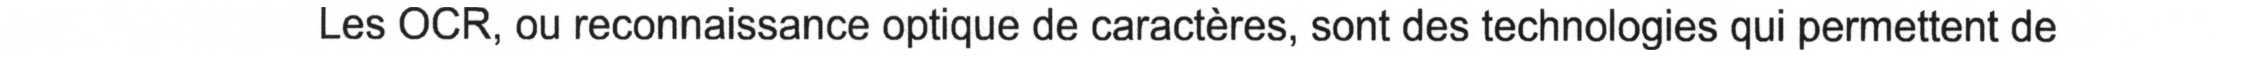

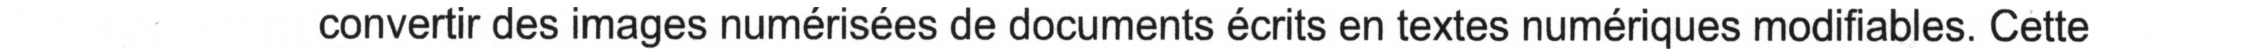

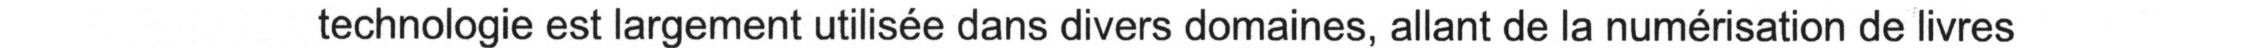

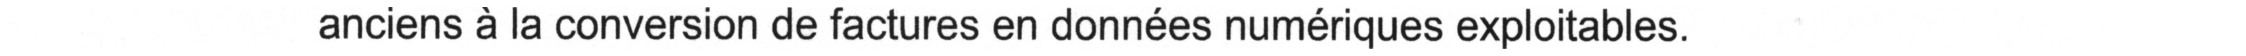

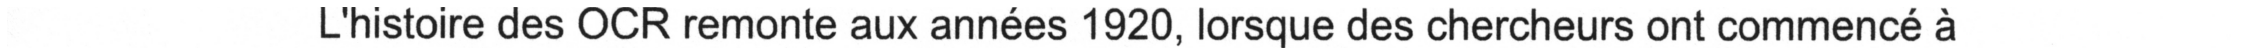

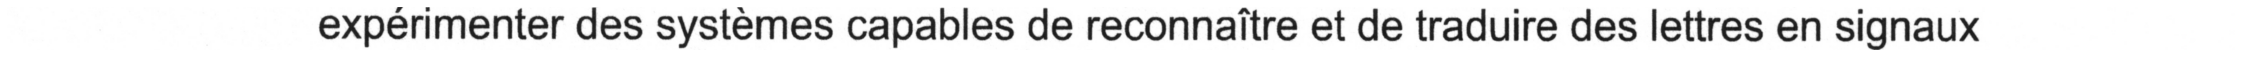

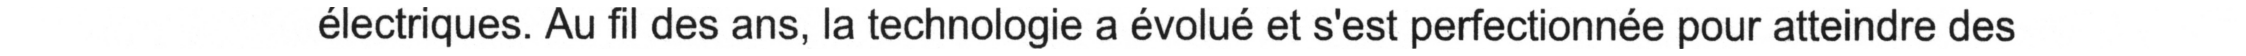

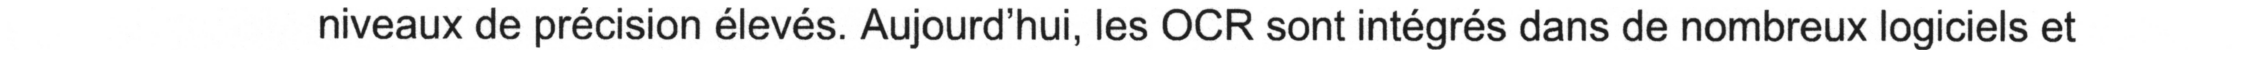

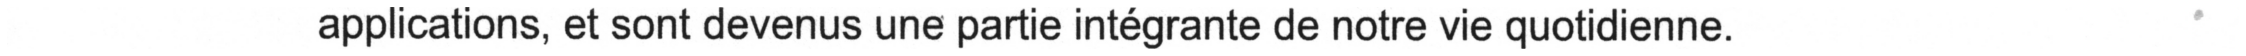

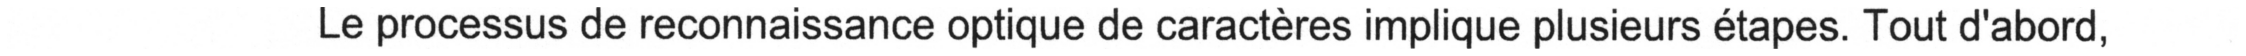

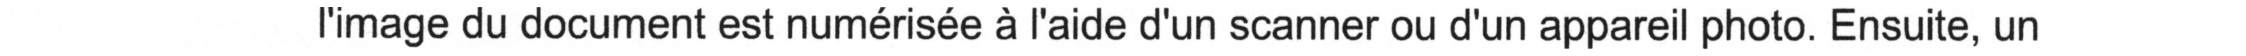

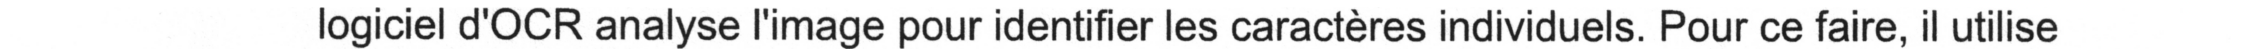

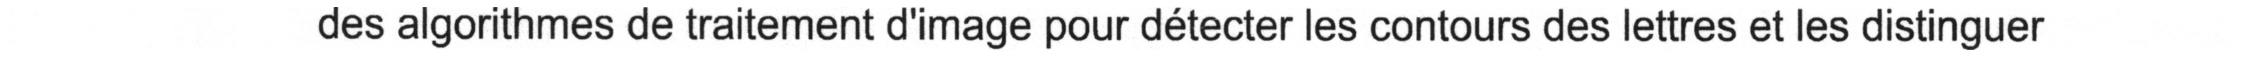

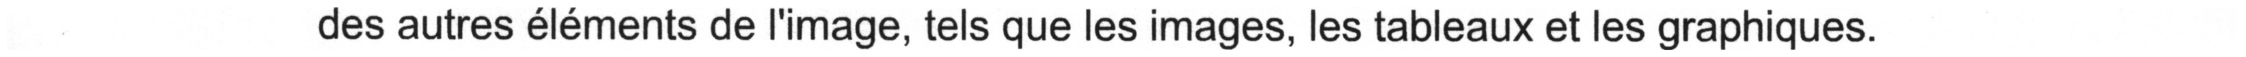

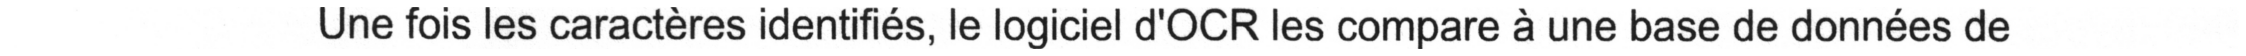

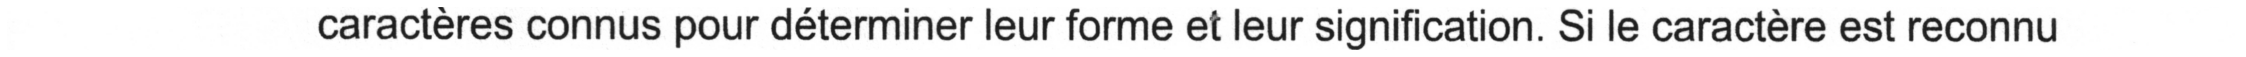

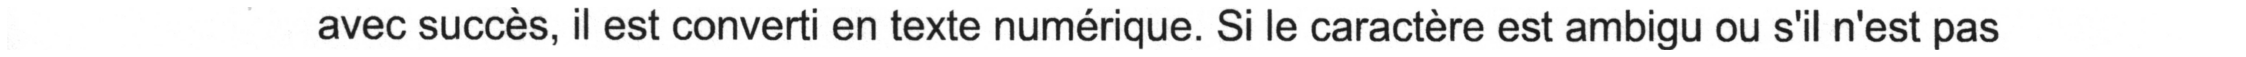

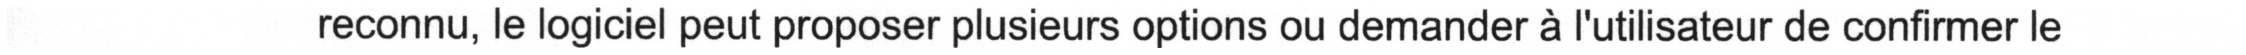

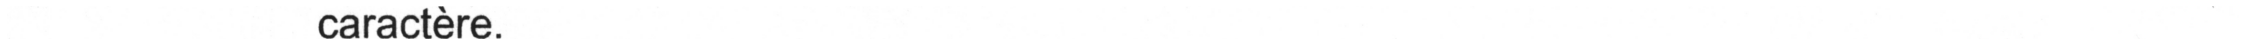

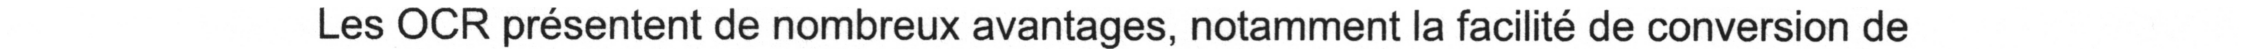

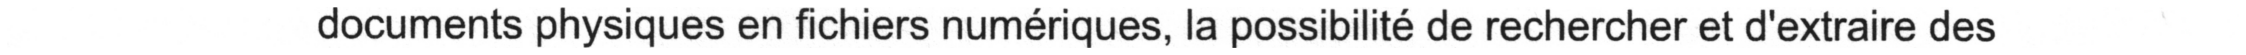

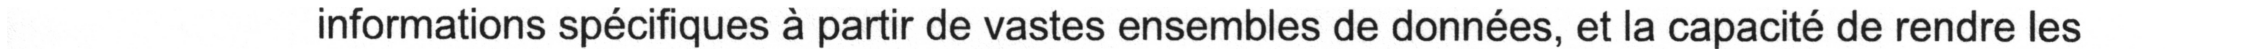

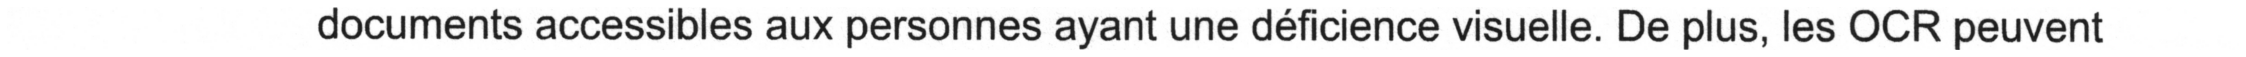

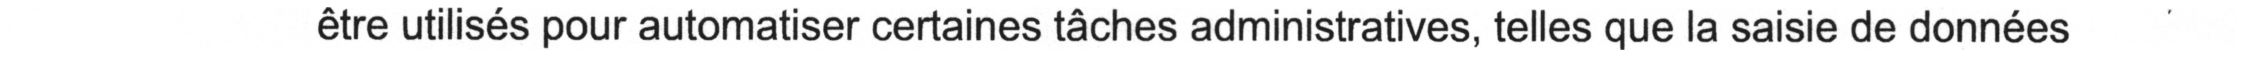

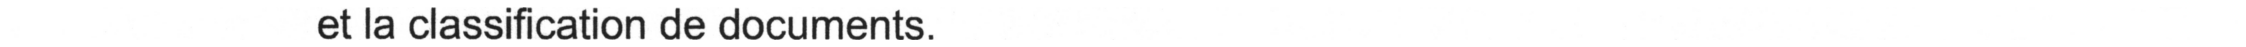

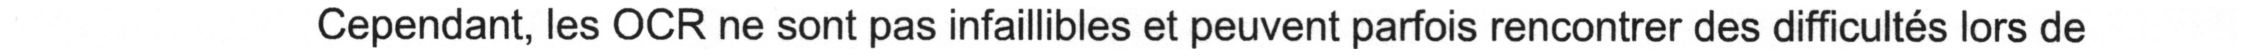

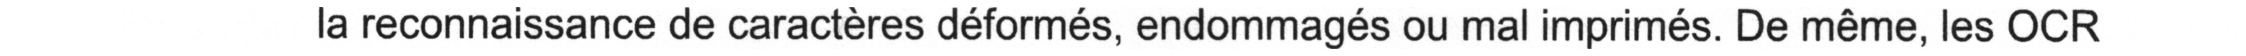

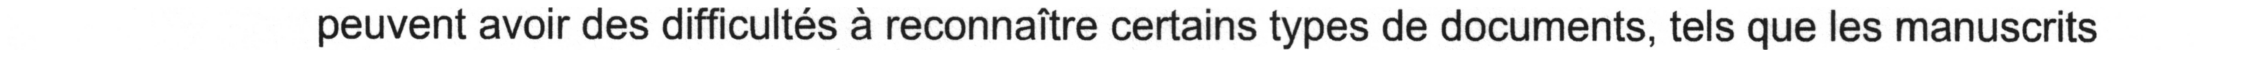

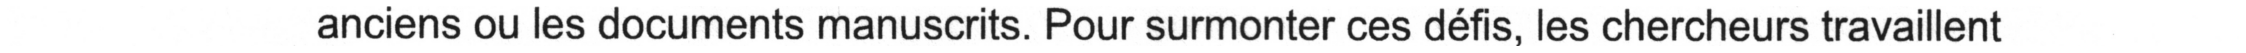

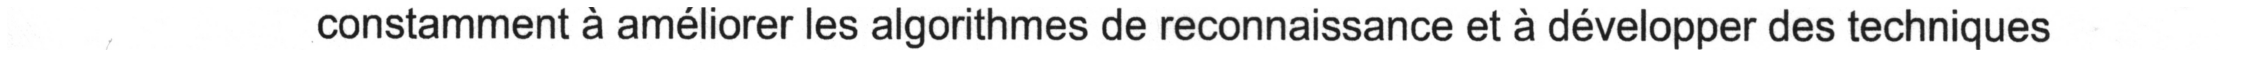

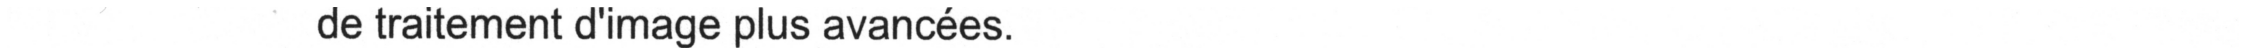

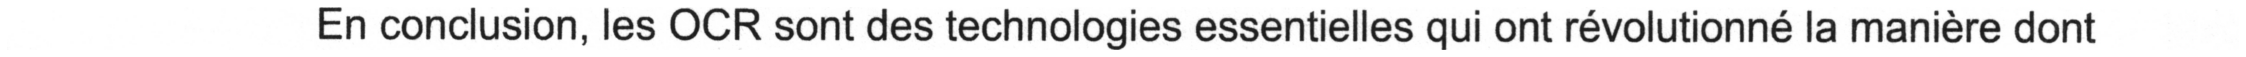

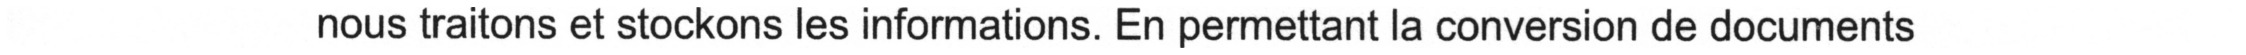

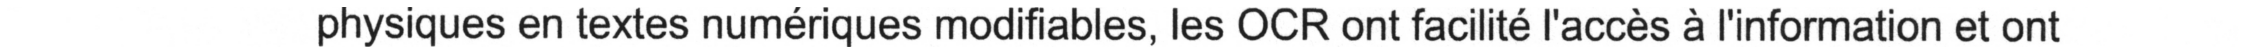

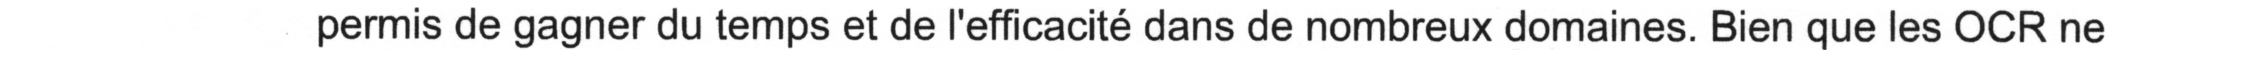

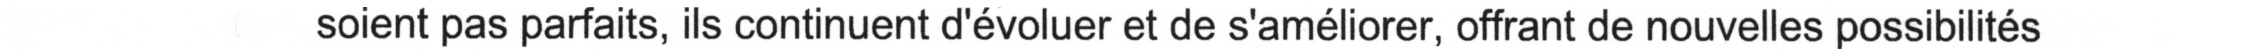

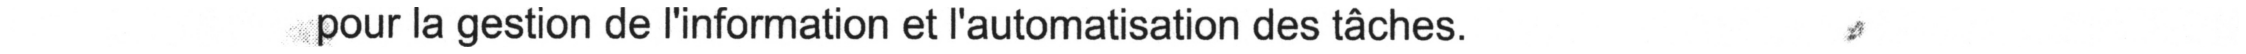

In [6]:
for elt in indices_lignes : 
    plt.figure(figsize=(40,20))
    plt.imshow(image[elt[0]:elt[1]])
    plt.axis('off')
    plt.show()

In [ ]:
def separe_en_caracteres(image_binary: np.ndarray, indices_debut_fin_ligne: tuple, taux=0.001, seuil_espace_mot=15) -> list:
    """
    Description : Prend en entrée une ligne de texte dans une image et renvoie les indices de colonnes de début et de fin de chaque caractère,
                  incluant les espaces entre les mots sous forme de tuples d'indices.

    Exemple : >>> ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)
                  ranges = [ (0, 21), (25, 65), (66, 79), (80, 85), ...]

    Inputs : - image_binary (np.ndarray) : la version binarisée de l'image dont on veut extraire les caractères
             - indices_debut_fin_ligne (tuple) : les indices de début et de fin de la ligne dont on veut extraire les caractères
             - taux (float) : fixé de base à 0.001, permet de séparer les colonnes de pixels contenant de l'information ou non
             - seuil_espace_mot (int) : le seuil pour détecter les espaces entre les mots

    Output : (ranges) list : une liste de tuples des indices de colonnes de début et de fin de chaque caractère et espaces pour la ligne entrée
    """
   
    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {k: 0 for k in range(len(h[0]))}

    # Comptage des pixels noirs par colonne
    for i in range(len(h)):
        for j in range(len(h[i])):
            if h[i][j] == 0:
                dictionnaire[j] += 1
    
    # Calcul du taux de pixels noirs pour chaque colonne
    for num_colonne in dictionnaire.keys():
        dictionnaire[num_colonne] /= len(h)

    # Liste des indices de colonnes ayant un taux de pixels noirs supérieur au seuil
    indices = [elt for elt in dictionnaire.keys() if dictionnaire[elt] >= taux]

    # Obtenir des plages continues de pixels représentant les caractères et les espaces
    ranges = []
    if not indices:
        return ranges  # Retourne une liste vide si aucun indice trouvé

    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            # Ajouter la plage de colonnes pour un caractère
            ranges.append((max(0, start - 2), min(len(h[0]) - 1, indices[i - 1] + 2)))
            # Si l'écart entre deux indices est grand, ajouter un espace pour les mots sous forme de tuple d'indices
            if indices[i] - indices[i - 1] > seuil_espace_mot:
                ranges.append((indices[i - 1] + 1, indices[i] - 1))  # Ajouter les indices de colonnes vides
            start = indices[i]
    ranges.append((max(0, start - 2), min(len(h[0]) - 1, indices[-1] + 2)))

    return ranges


### Séparation en caractères

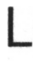

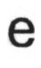

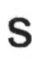

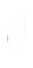

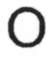

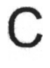

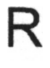

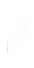

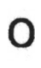

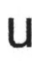

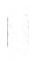

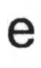

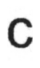

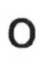

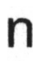

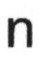

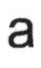

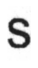

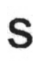

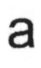

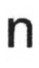

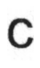

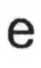

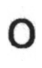

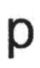

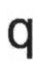

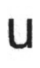

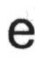

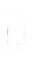

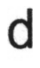

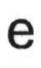

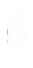

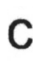

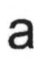

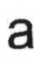

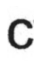

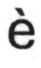

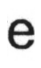

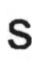

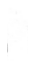

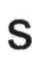

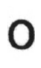

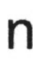

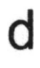

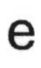

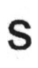

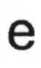

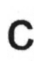

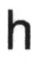

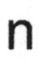

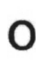

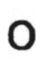

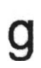

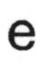

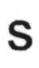

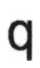

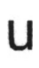

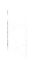

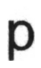

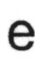

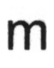

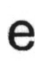

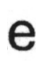

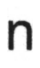

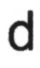

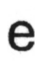

In [7]:
indices_debut_fin_ligne = indices_lignes[0]

ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

for t in ranges : 
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], t[0]:t[1]], cmap='gray')
    plt.show()